#Question 1

1.   Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
2.   What metric would you report for this dataset?
3.   What is its value?


1. First, I had to take a look at what the data looks like to gain insights. Using visualization and data.describe() I was able to see that the AOV was simply the mean of the dataset. Then I noticed there were order_amount values that seemed way too high for the price of shoes, so I decided to look closely at the dataset by sorting by descending order by order_amount and happened to find potential fraudulent activity. I decided to remove these activities and recalculate the AOV's by each of the shops. See below of work and my comments / progress.

2. I would use the median as a report for this dataset. This is because as seen in the dataset, there exists a shop that sells very high end and expensive shoes. Therefore, if we use the mean, this shop will affect the mean of the AOVs to be very high, acting like an outlier.

3. The median AOVs of all the shops are 308.89

##Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path = "/content/drive/MyDrive/Shopify/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import Data and Visualize

In [4]:
data = pd.read_csv(path)

In [5]:
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [7]:
data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


##Data Analysis


*   The mean of the data is \$3145.13, which is also the given AOV.
*   As stated in the problem, we have 100 shops.
* There are 5000 orders, 999 users, and total_items of 2000.
* max order_amount is $704000, which seems like a very high number.

## Therefore, I want to check for outliers in the dataset.



### Sort by order_amount to see outliers

In [18]:
# sort by order_amount to see outliers
data = data.sort_values('order_amount',ascending = False )
data.head(30)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
2492,2493,78,834,102900,4,debit,2017-03-04 4:37:34
2690,2691,78,962,77175,3,debit,2017-03-22 7:33:25
2906,2907,78,817,77175,3,debit,2017-03-16 3:45:46
4715,4716,78,818,77175,3,debit,2017-03-05 5:10:44
2564,2565,78,915,77175,3,debit,2017-03-25 1:19:35
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20
3403,3404,78,928,77175,3,debit,2017-03-16 9:45:05
4192,4193,78,787,77175,3,credit_card,2017-03-18 9:25:32
4420,4421,78,969,77175,3,debit,2017-03-09 15:21:35


### I see just from this table that shop_id 78 and 42 contains outliers. So I am going to check the distribution of order_amount in these two shops.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


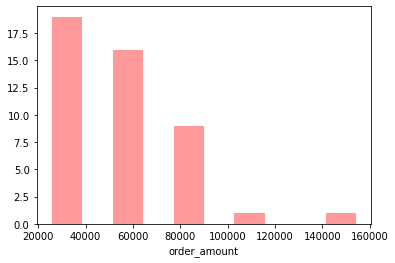

In [19]:
sns.distplot(data[data['shop_id']==78]['order_amount'], bins = 10, color = 'red', kde = False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


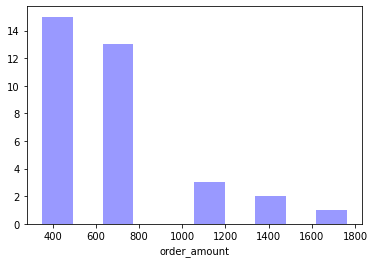

In [20]:
sns.distplot(data[data['shop_id']==42]['order_amount'], bins = 10, color = 'blue', kde = False)

It seems that shop_id 78 contains high numbers but they are distributed pretty evenly and maybe this shop sells high end, expensive shoes. However, shop_id 42 contains some low amounts as well as a super high amount. It seems there is some kind of computer activity happening that causes fake orders. We can remove those orders with the order_amount of $70400 as we've seen in the earlier tables.

### I want to make sure that I am not missing out in any more outliers or fraud activity. To see this, I am going to visualize box plots of all the shops and the order_amount.

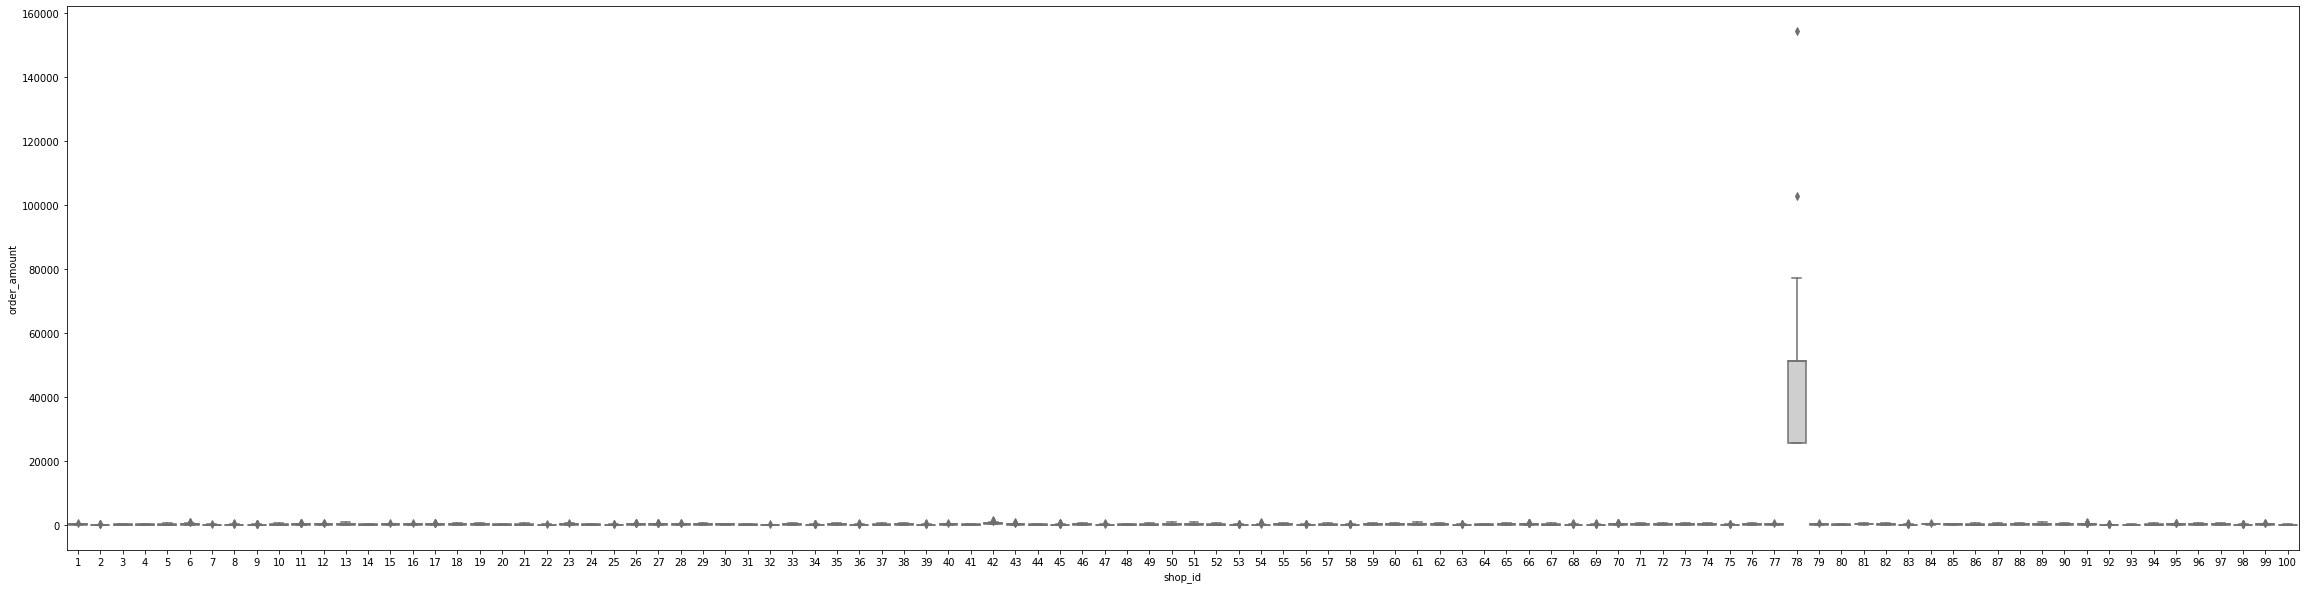

In [21]:
plt.figure(figsize = (40,10))
sns.boxplot(x='shop_id', y = 'order_amount', data = data, palette = 'pastel')

### Drop the fraudulent orders with order amount $704000.

In [22]:
data = data.drop(data.index[data['order_amount'] == 704000])
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
2492,2493,78,834,102900,4,debit,2017-03-04 4:37:34
2690,2691,78,962,77175,3,debit,2017-03-22 7:33:25
2906,2907,78,817,77175,3,debit,2017-03-16 3:45:46
4715,4716,78,818,77175,3,debit,2017-03-05 5:10:44


Now if we check the mean, it has gone down to 754.

In [23]:
data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4983.000000,4983.000000,4983.000000,4983.000000,4983.00000
mean,2501.060405,50.106362,849.918322,754.091913,1.99398
std,1443.090253,29.051718,86.800308,5314.092293,0.98318
min,1.000000,1.000000,700.000000,90.000000,1.00000
25%,1250.500000,24.000000,776.000000,163.000000,1.00000
50%,2502.000000,50.000000,850.000000,284.000000,2.00000
75%,3750.500000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,154350.000000,8.00000


## AOV

AOV is actually the average order value for each shop. But it seems the original calculation was taking the average order value for all the shops altogether. Here we will calculate the AOV for each shops.

In [14]:
shop_order_amt = data.groupby(['shop_id'])['order_amount'].agg('sum')
shop_num_orders = data.groupby(['shop_id'])['order_id'].count()
shop_aov = shop_order_amt / shop_num_orders
shops_aov = pd.concat([shop_order_amt, shop_num_orders, shop_aov], axis = 1)
shops_aov

,order_amount,order_id,0
shop_id,,,
1,13588,44,308.818182
2,9588,55,174.327273
3,14652,48,305.250000
4,13184,51,258.509804
5,13064,45,290.311111
...,...,...,...
96,16830,51,330.000000
97,15552,48,324.000000
98,14231,58,245.362069


In [15]:
shops_aov = shops_aov.rename(columns = {'shop_id':'shop_id', 'order_amount':'total_revenue', 'order_id':'num_orders', 0: 'aov'})
shops_aov

,total_revenue,num_orders,aov
shop_id,,,
1,13588,44,308.818182
2,9588,55,174.327273
3,14652,48,305.250000
4,13184,51,258.509804
5,13064,45,290.311111
...,...,...,...
96,16830,51,330.000000
97,15552,48,324.000000
98,14231,58,245.362069


Now we are given a table of AOVs for all the shops. It is obvious that some shops will have higher AOVs than others because for example as we've seen earlier in the dataset, some shops might be selling very high end and expensive shoes while others can be in the normal price range. Let us now take a look a the mean of all the AOVs.

In [16]:
shops_aov.describe()

,total_revenue,num_orders,aov
count,1.000000e+02,100.000000,100.000000
mean,3.757640e+04,49.830000,792.341539
std,2.248984e+05,7.460407,4891.366502
min,6.840000e+03,34.000000,162.857143
25%,1.293050e+04,44.000000,263.675962
50%,1.488750e+04,50.000000,308.889758
75%,1.760000e+04,55.000000,336.628352
max,2.263800e+06,68.000000,49213.043478


The Mean is still high. Let us see what the Median looks like.

In [17]:
print('Mean of AOV by Shops:', shops_aov.aov.mean())
print('Median of AOV by Shops:', shops_aov.aov.median())

Mean of AOV by Shops: 792.341538867417
Median of AOV by Shops: 308.8897584973166


#Question 2

**1.   How many orders were shipped by Speedy Express in total?**

SELECT COUNT(o.OrderID) \\
FROM Orders o \\
JOIN Shippers s \\
ON o.ShipperID = s.ShipperID \\
WHERE s.ShipperName = 'Speedy Express'

**54**

**2.   What is the last name of the employee with the most orders?**

SELECT e.LastName, COUNT(o.OrderID) \\
FROM Orders o \\
JOIN Employees e \\
ON o.EmployeeID = e.EmployeeID \\
GROUP BY 1 \\
ORDER BY 2 DESC \\
LIMIT 1

**Peacock**

**3.   What product was ordered the most by customers in Germany?**

SELECT p.ProductName, COUNT(o.OrderID) \\
FROM Orders o \\
JOIN OrderDetails d \\
ON o.OrderID = d.OrderID \\
JOIN Products p \\
ON d.ProductID = p.ProductID \\
JOIN Customers c \\
ON c.CustomerID = o.CustomerID \\
WHERE c.Country = 'Germany' \\
GROUP BY 1 \\
ORDER BY 2 DESC \\
LIMIT 1

**Gorgonzola Telino**